# Data preprocessing: PCA

**NOTEBOOK GOAL**: Aggregate features into meaningful Principal Components in order then, to discard those features modelled by the components.

**DATASET TRANSFORMATION**: `preprocessed_train.csv` >> `preprocessed_train_PCA.csv`


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('./dataset/preprocessed_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433958 entries, 0 to 433957
Data columns (total 55 columns):
StoreID                        433958 non-null int64
Date                           433958 non-null object
IsHoliday                      433958 non-null int64
HasPromotions                  433958 non-null int64
StoreType                      433958 non-null object
AssortmentType                 433958 non-null object
NearestCompetitor              433958 non-null int64
Region                         433958 non-null int64
NumberOfCustomers              433958 non-null int64
NumberOfSales                  433958 non-null int64
Region_AreaKM2                 433958 non-null int64
Region_GDP                     433958 non-null int64
Region_PopulationK             433958 non-null int64
CloudCover                     433958 non-null float64
Events                         433958 non-null object
Max_Dew_PointC                 433958 non-null int64
Max_Humidity                   4339

In [4]:
m = df.isnull().any()
print("========= COLUMNS WITH NULL VALUES =================")
print(m[m])
print("========= COLUMNS WITH INFINITE VALUES =================")
m = np.isfinite(df.select_dtypes(include=['float64'])).any()
print(m[m])

========= COLUMNS WITH NULL VALUES =================
Series([], dtype: bool)
========= COLUMNS WITH INFINITE VALUES =================
CloudCover           True
Max_VisibilityKm     True
Mean_VisibilityKm    True
Min_VisibilitykM     True
Precipitationmm      True
MeanStoreSales       True
MeanRegionSales      True
D_DayOfWeek_cos      True
D_DayOfWeek_sin      True
dtype: bool


Normalization

In [5]:
df = df.reset_index()

In [6]:
import sklearn.preprocessing
features = ['Max_Dew_PointC','Max_Humidity','Max_Sea_Level_PressurehPa','Max_TemperatureC',
            'Max_Wind_SpeedKm_h','Mean_Dew_PointC','Mean_Humidity','Mean_Sea_Level_PressurehPa',
            'Mean_TemperatureC','Mean_Wind_SpeedKm_h','Min_Dew_PointC','Min_Humidity',
            'Min_Sea_Level_PressurehPa','Min_TemperatureC','Precipitationmm','Mean_VisibilityKm',
            'Events_Fog','Events_Hail','Events_Thunderstorm','Events_Rain','Events_Snow']
# Separating out the features
x = df.loc[:, features].values
x
# Separating out the target
y = df.loc[:,['NumberOfSales']].values
# Standardizing the features
x = sklearn.preprocessing.normalize(x,axis=0)
dff=pd.DataFrame(x)
dff

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000145,0.001618,0.001539,0.000182,0.001338,-0.000177,0.001639,0.001540,0.000121,0.001863,...,0.001937,0.001543,0.000171,0.000000,0.000000e+00,0.00000,0.000000,0.0,0.001972,0.005478
1,0.000000,0.001407,0.001536,0.000455,0.001019,-0.000177,0.001459,0.001536,0.000364,0.001165,...,0.001605,0.001537,0.000171,0.000000,5.028127e-09,0.00000,0.000000,0.0,0.000000,0.005478
2,0.000000,0.001310,0.001530,0.000364,0.001465,-0.000177,0.001419,0.001531,0.000364,0.001165,...,0.001522,0.001534,0.000342,0.000000,1.005625e-08,0.00000,0.000000,0.0,0.001972,0.000000
3,-0.000436,0.001294,0.001531,0.000728,0.001211,-0.000706,0.001119,0.001531,0.000364,0.001165,...,0.000692,0.001533,-0.000171,0.000000,1.508438e-08,0.00000,0.000000,0.0,0.000000,0.000000
4,-0.000290,0.001504,0.001527,0.001001,0.001529,-0.000530,0.001299,0.001525,0.000485,0.001281,...,0.000719,0.001524,-0.000342,0.000000,2.514063e-08,0.00000,0.000000,0.0,0.000000,0.000000
5,-0.000145,0.001407,0.001516,0.001183,0.000892,-0.000353,0.001199,0.001514,0.000728,0.000932,...,0.000664,0.001512,-0.000342,0.000000,3.016876e-08,0.00000,0.000000,0.0,0.000000,0.000000
6,0.000290,0.001504,0.001504,0.001365,0.001019,-0.000177,0.001179,0.001502,0.000849,0.001165,...,0.000692,0.001500,-0.000171,0.000000,3.519689e-08,0.00000,0.000000,0.0,0.000000,0.000000
7,0.001162,0.001407,0.001494,0.001456,0.000828,0.000353,0.001099,0.001496,0.001335,0.000699,...,0.000775,0.001498,0.001026,0.000000,4.022501e-08,0.00000,0.000000,0.0,0.001972,0.000000
8,0.001162,0.001504,0.001494,0.001547,0.000892,0.001236,0.001419,0.001496,0.001456,0.001281,...,0.001024,0.001497,0.001197,0.000280,4.525314e-08,0.00000,0.000000,0.0,0.001972,0.000000
9,0.001452,0.001618,0.001494,0.001183,0.001657,0.001236,0.001599,0.001497,0.001213,0.001281,...,0.001439,0.001500,0.001026,0.000000,5.028127e-08,0.00000,0.000000,0.0,0.001972,0.000000


In [7]:
# remaining features after PCA
remaining_features = list(df.columns)

for f in features:
    remaining_features.remove(f)

remaining_features

['index',
 'StoreID',
 'Date',
 'IsHoliday',
 'HasPromotions',
 'StoreType',
 'AssortmentType',
 'NearestCompetitor',
 'Region',
 'NumberOfCustomers',
 'NumberOfSales',
 'Region_AreaKM2',
 'Region_GDP',
 'Region_PopulationK',
 'CloudCover',
 'Events',
 'Max_VisibilityKm',
 'Min_VisibilitykM',
 'WindDirDegrees',
 'D_Day',
 'D_DayOfYear',
 'D_Month',
 'D_Year',
 'D_DayOfweek',
 'StoreType_SuperMarket',
 'StoreType_HyperMarket',
 'StoreType_StandardMarket',
 'StoreType_ShoppingCenter',
 'AssortmentType_General',
 'AssortmentType_WithNFDept',
 'AssortmentType_WithFishDept',
 'MeanStoreSales',
 'MeanRegionSales',
 'D_DayOfWeek_cos',
 'D_DayOfWeek_sin']

Performing normalization

In [8]:
from sklearn.decomposition import PCA

n_components=12
p_list = ['p'+str(x) for x in range(1, n_components+1)]
pca = PCA(n_components=n_components)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = p_list)

Computing variance

In [9]:
pca.explained_variance_ratio_

array([0.3402783 , 0.14808321, 0.11248691, 0.09962432, 0.08654355,
       0.07698712, 0.04899715, 0.03064128, 0.02711388, 0.0178757 ,
       0.00433766, 0.00265874])

These values represent the percentage of information each principal components provide

In [10]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
var1

array([34.03, 48.84, 60.09, 70.05, 78.7 , 86.4 , 91.3 , 94.36, 97.07,
       98.86, 99.29, 99.56])

This array represents the total percentage of information available considering from 1 to n principal components

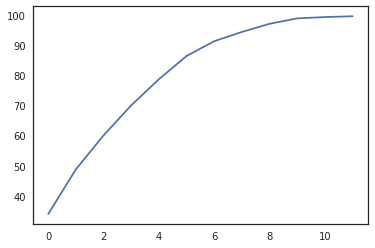

In [11]:
plt.plot(var1)

In [12]:
print(pd.DataFrame(pca.components_,columns=dff.columns,index = p_list))

           0         1         2         3         4         5         6   \
p1  -0.327181  0.002972  0.000313 -0.260699  0.008366 -0.392248  0.027524   
p2  -0.013747  0.006824 -0.001587 -0.073808  0.105688 -0.017992  0.034767   
p3   0.052009  0.002650  0.000540  0.069511 -0.060933  0.057590 -0.015999   
p4  -0.010741  0.035226  0.001199 -0.024811 -0.124411 -0.017389  0.053500   
p5  -0.014472  0.010981  0.000100 -0.063472 -0.002535 -0.021645  0.036387   
p6   0.132245  0.021167 -0.000384  0.057990 -0.095500  0.173638  0.032000   
p7  -0.050666 -0.038220  0.001782  0.174166 -0.127998 -0.080995 -0.132819   
p8   0.005908 -0.013986 -0.000355  0.042925  0.165692 -0.011421 -0.036693   
p9   0.023787 -0.042515 -0.001613  0.136354  0.550679 -0.032820 -0.119273   
p10 -0.000200  0.051523  0.000263 -0.302701  0.108407  0.135089  0.233704   
p11  0.389396  0.175096 -0.000496  0.223919  0.479931  0.250740  0.137640   
p12 -0.423136 -0.058672 -0.000522 -0.146496  0.579457 -0.216049 -0.055661   

This values represent how the 18 attributes considered influence the weights
of the principal components vector

In [13]:
for x in features: 
    df = df.drop(x, 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433958 entries, 0 to 433957
Data columns (total 35 columns):
index                          433958 non-null int64
StoreID                        433958 non-null int64
Date                           433958 non-null object
IsHoliday                      433958 non-null int64
HasPromotions                  433958 non-null int64
StoreType                      433958 non-null object
AssortmentType                 433958 non-null object
NearestCompetitor              433958 non-null int64
Region                         433958 non-null int64
NumberOfCustomers              433958 non-null int64
NumberOfSales                  433958 non-null int64
Region_AreaKM2                 433958 non-null int64
Region_GDP                     433958 non-null int64
Region_PopulationK             433958 non-null int64
CloudCover                     433958 non-null float64
Events                         433958 non-null object
Max_VisibilityKm               4339

In [14]:
finalDf=pd.concat([df,principalDf],axis=1)
finalDf

,index,StoreID,Date,IsHoliday,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,0,1000,01/03/2016,0,0,Hyper Market,General,326,7,495,...,-0.000928,-0.000821,-0.002141,0.002836,-0.000841,-0.001263,0.000318,-0.000180,-0.000371,-0.000053
1,1,1000,02/03/2016,0,0,Hyper Market,General,326,7,608,...,-0.000572,-0.000465,-0.002355,0.003005,0.001131,-0.001301,0.000109,0.000120,-0.000312,0.000174
2,2,1000,04/03/2016,0,0,Hyper Market,General,326,7,665,...,-0.000510,-0.000580,0.000349,-0.001332,-0.000546,-0.001428,-0.000134,-0.000554,-0.000372,0.000443
3,3,1000,05/03/2016,0,0,Hyper Market,General,326,7,630,...,-0.000302,-0.000275,0.000193,-0.001625,0.001566,-0.001276,0.000277,-0.000603,-0.000367,0.000272
4,4,1000,07/03/2016,0,1,Hyper Market,General,326,7,763,...,-0.000269,-0.000334,0.000172,-0.001505,0.001451,-0.001219,0.000466,-0.000393,0.000048,0.000330
5,5,1000,08/03/2016,0,1,Hyper Market,General,326,7,675,...,-0.000155,-0.000217,0.000126,-0.001337,0.001661,-0.001365,-0.000016,-0.000713,-0.000058,0.000015
6,6,1000,09/03/2016,0,1,Hyper Market,General,326,7,690,...,-0.000094,-0.000346,0.000076,-0.001138,0.001553,-0.001301,0.000192,-0.000515,0.000076,-0.000104
7,7,1000,10/03/2016,0,1,Hyper Market,General,326,7,617,...,-0.000101,-0.000705,0.000046,-0.000642,-0.000026,-0.001470,-0.000296,-0.001501,-0.000236,-0.000064
8,8,1000,11/03/2016,0,1,Hyper Market,General,326,7,636,...,-0.000111,-0.000872,0.000183,-0.000188,-0.000343,-0.001419,-0.000128,-0.000657,-0.000236,-0.000168
9,9,1000,12/03/2016,0,0,Hyper Market,General,326,7,511,...,-0.000126,-0.000916,0.000088,-0.000312,-0.000764,-0.001363,0.000075,-0.000113,0.000336,0.000134


In [15]:
finalDf.head()

,index,StoreID,Date,IsHoliday,HasPromotions,StoreType,AssortmentType,NearestCompetitor,Region,NumberOfCustomers,...,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,0,1000,01/03/2016,0,0,Hyper Market,General,326,7,495,...,-0.000928,-0.000821,-0.002141,0.002836,-0.000841,-0.001263,0.000318,-0.000180,-0.000371,-0.000053
1,1,1000,02/03/2016,0,0,Hyper Market,General,326,7,608,...,-0.000572,-0.000465,-0.002355,0.003005,0.001131,-0.001301,0.000109,0.000120,-0.000312,0.000174
2,2,1000,04/03/2016,0,0,Hyper Market,General,326,7,665,...,-0.000510,-0.000580,0.000349,-0.001332,-0.000546,-0.001428,-0.000134,-0.000554,-0.000372,0.000443
3,3,1000,05/03/2016,0,0,Hyper Market,General,326,7,630,...,-0.000302,-0.000275,0.000193,-0.001625,0.001566,-0.001276,0.000277,-0.000603,-0.000367,0.000272
4,4,1000,07/03/2016,0,1,Hyper Market,General,326,7,763,...,-0.000269,-0.000334,0.000172,-0.001505,0.001451,-0.001219,0.000466,-0.000393,0.000048,0.000330


In [16]:
finalDf.drop(['index'],inplace=True,axis=1)

In [17]:
print(finalDf.shape)
finalDf.head().T

(433958, 46)


,0,1,2,3,4
StoreID,1000,1000,1000,1000,1000
Date,01/03/2016,02/03/2016,04/03/2016,05/03/2016,07/03/2016
IsHoliday,0,0,0,0,0
HasPromotions,0,0,0,0,1
StoreType,Hyper Market,Hyper Market,Hyper Market,Hyper Market,Hyper Market
AssortmentType,General,General,General,General,General
NearestCompetitor,326,326,326,326,326
Region,7,7,7,7,7
NumberOfCustomers,495,608,665,630,763
NumberOfSales,5676,8111,8300,7154,10110


In [18]:
finalDf.to_csv('./dataset/preprocessed_train_PCA.csv')